# VSB Power Grid Fault Detection

In [1]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Three_Phase_Electric_Power_Transmission.jpg/1200px-Three_Phase_Electric_Power_Transmission.jpg')

Data Source: https://www.kaggle.com/c/vsb-power-line-fault-detection

Useful read: https://en.wikipedia.org/wiki/Three-phase_electric_power


### Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyarrow.parquet as pq #reading parquet files 
import matplotlib.pyplot as plt
import seaborn as sns

### Downloading Data

In [3]:
# !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10684/230682/compressed/train.parquet.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1591440128&Signature=GJKuu2SJz7a88aasJtMo7eAKdSUKF0CaZJ7p9zq5rx0vggun2j45VETJ5B%2FpckzMKvAbmQowL%2BCj9Va6gjpeFpzVulB%2Bk%2F9w2a8Zh48lWMvuz039FdsZA3lvpmadaTCRJR%2FL8ew16d8zkjt4oI8lO1UodHQbySQEOaIckhCDMzhX3nMbHKkQF96GeXNdvWWk6fnoWDlAv81S3JFRLfm%2BpByZi6U0xvKcZZDfUDlP60mxxEfKjSr4261GJPvKV5EtFFxM78yARvsCEFFuiSchuOfaFn%2B09Htv%2BhRAjutu4yWO1RkANwn%2Fo7Mh8icQtWSq6zrbM3g%2BSb9nyEwy7sPncQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.parquet.zip" -c -O 'train.parquet.zip'

### Taking first 2000 rows (due to computational limitations) for EDA and visualization

In [4]:
number_of_signal = 2001

In [5]:
train = pq.read_pandas('train.parquet', columns=[str(i) for i in range(number_of_signal)]).to_pandas()
metadata = pd.read_csv('metadata_train.csv')

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,-9,12,-18,6,-12,17,-7,-16,16,-4
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,-9,11,-19,7,-12,17,-8,-16,16,-4
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,-9,11,-20,4,-13,17,-8,-17,16,-5
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,-9,12,-19,8,-12,17,-8,-18,14,-6
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,-9,12,-19,6,-12,17,-8,-16,15,-4


In [7]:
train.shape

(800000, 2001)

In [11]:
metadata.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [12]:
metadata.shape

(8712, 4)

In [13]:
train_metadata = metadata[:number_of_signal]

In [14]:
train_metadata.shape

(2001, 4)

#### Observation:

As each column represent a signal, it will be  better if we transpose the dataframe

### Transposing the dataframe as each column represents one data point.

In [15]:
train = train.T

In [16]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999
0,18,18,17,18,18,18,19,18,18,17,...,18,18,17,17,18,19,19,17,19,17
1,1,0,-1,1,0,0,1,0,0,0,...,1,0,0,0,0,2,1,0,1,0


### Adding signal id to the main data frame

In [17]:
train['signal_id'] = list(train_metadata['signal_id'])

In [18]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,799991,799992,799993,799994,799995,799996,799997,799998,799999,signal_id
0,18,18,17,18,18,18,19,18,18,17,...,18,17,17,18,19,19,17,19,17,0
1,1,0,-1,1,0,0,1,0,0,0,...,0,0,0,0,2,1,0,1,0,1


### Merging Metadata and Signal Data based on signal_id

In [19]:
train = train.merge(train_metadata, on='signal_id')

In [20]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,799994,799995,799996,799997,799998,799999,signal_id,id_measurement,phase,target
0,18,18,17,18,18,18,19,18,18,17,...,18,19,19,17,19,17,0,0,0,0
1,1,0,-1,1,0,0,1,0,0,0,...,0,2,1,0,1,0,1,0,1,0


### Checking for null values in the dataframe

In [21]:
train.isnull().sum().sum()

0

#### Observation: 

There is no null values

### Plotting count vs target plots to check data imbalance

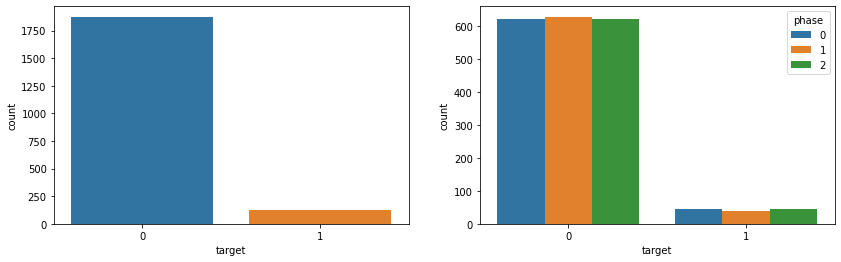

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(x="target", data=train, ax=ax1)
sns.countplot(x="target", data=train, hue="phase", ax=ax2);

#### Observation:

Data is highly imbalances as the target with value 1 are much less than the target with value 0

### Percentage of positive and negative target values

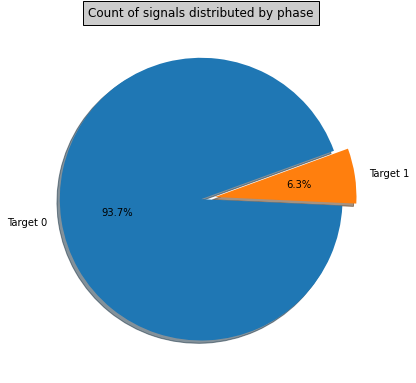

In [104]:
# https://www.w3resource.com/graphics/matplotlib/piechart/matplotlib-piechart-exercise-2.php
plt.rcParams["figure.figsize"] = (40,6.5)
data = train['target'].value_counts()
labels = ['Target 0', 'Target 1']
colors = ["#1f77b4", "#ff7f0e"]
title = 'Count of signals distributed by phase'
explodes = [0, 0.1]
plt.pie(data,explode=explodes, labels=labels, colors=colors, shadow=True, startangle=20, autopct='%.1f%%')
plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [20]:
target_count = train.target.value_counts()
print("negative(target=0) target: {}".format(target_count[0]))
print("positive(target=1) target: {}".format(target_count[1]))
print("positive data {:.3}%".format((target_count[1]/(target_count[0]+target_count[1]))*100))

negative(target=0) target: 1875
positive(target=1) target: 126
positive data 6.3%


#### Observation:

Data is imbalanced and the faulty signals are only 6.3% of the total signals

### Checking if there are different values of target in the different phase of same signal

In [21]:
train[['id_measurement', 'phase']]

,id_measurement,phase
0,0,0
1,0,1
2,0,2
3,1,0
4,1,1
...,...,...
1996,665,1
1997,665,2
1998,666,0
1999,666,1


In [22]:
target_mismatch = train[["id_measurement", "target"]].groupby(["id_measurement"]).sum().query("target != 3 & target != 0")
print("Target values not all postive or negative for same signal: {}".format(target_mismatch.shape[0]))
target_mismatch

Target values not all postive or negative for same signal: 11


,target
id_measurement,
67,2
96,1
126,1
159,1
271,1
301,1
443,1
518,1
601,2


#### Checking target for id _measurement==67 where target value is different in different phase

In [23]:
train[train['id_measurement'] == 67]

,0,1,2,3,4,5,6,7,8,9,...,799994,799995,799996,799997,799998,799999,signal_id,id_measurement,phase,target
201,-22,-23,-24,-21,-25,-21,-22,-22,-20,-23,...,-22,-21,-23,-21,-23,-22,201,67,0,1
202,14,13,11,15,11,15,13,13,15,11,...,13,15,12,15,13,14,202,67,1,1
203,8,6,5,8,5,9,6,8,9,6,...,7,8,5,9,6,7,203,67,2,0


#### Observation:

Target values can be different for same signal in different phases

### Finding the Unique values of id_measurement in our dataset

In [24]:
print("id_measurement have {} unique values".format(train.id_measurement.nunique()))

id_measurement have 667 unique values


#### Observation:

The unique value of the id_measurement is as expected : (total signals) / 3 , as there are three phases of each signal

### Basic description of the id_measurement column 

In [25]:
train.id_measurement.value_counts().describe()

count    667.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: id_measurement, dtype: float64

#### Observation:

Values are all as expected.

Max count and min count of each signal is 3, as there are three phases of each signal

count is total/3, as each signal is having three phases.

### Printing unique values of phase column

In [26]:
print("phase have {} unique values {} in train".format(len(train.phase.unique()),train.phase.unique()))

phase have 3 unique values [0 1 2] in train


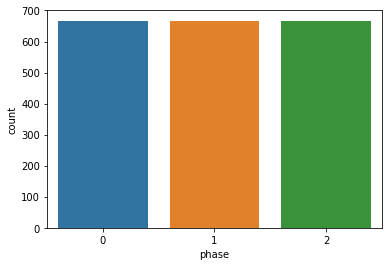

In [31]:
sns.countplot(train['phase']);

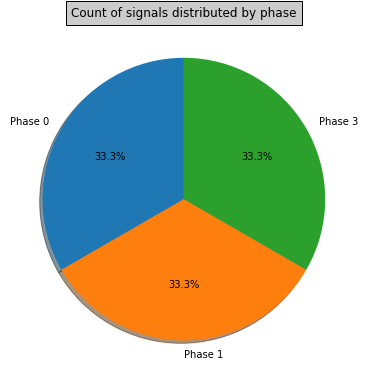

In [105]:
# https://www.w3resource.com/graphics/matplotlib/piechart/matplotlib-piechart-exercise-2.php
data = train['phase'].value_counts()
labels = ['Phase 0', 'Phase 1', 'Phase 3']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
title = 'Count of signals distributed by phase'
plt.pie(data, labels=labels, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
plt.show()

#### Observation:
Phase columns is having only 3 values 1,2,3 for each signal as there are three phases of each signal

## Plotting 2d plots using t-SNE using different values of perplexity and learning rate

#### Plotting the t-SNE plots only for 1/4th of the points due to computational limitations

#### 1. Using perplexity: 30 and learning rate: 200

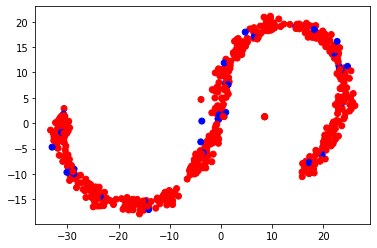

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

X_embedding = tsne.fit_transform(train[:500])
y = np.array(train['target'][:500])

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

del(tsne)

#### 2. Using perplexity: 50 and learning rate:200

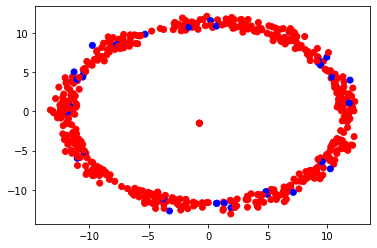

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, random_state=42)

X_embedding = tsne.fit_transform(train[:500])
y = np.array(train['target'][:500])

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

del(tsne)

#### 3. Using Perplexity:100 and learning rate: 150

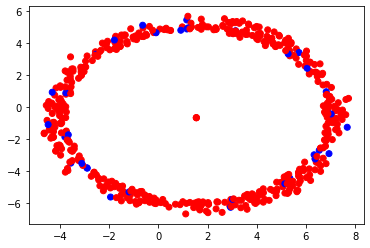

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100, learning_rate=150, random_state=42)

X_embedding = tsne.fit_transform(train[:500])
y = np.array(train['target'][:500])

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

del(tsne)

### Observation:

The points are not well seperated in 2-dimensions as observed by these t-sne plots

## Plotting signals 

#### Plotting normal Signal

In [141]:
#signal with target 0 (normal signal)
train.loc[1]['target']

0

(-100.0, 100.0)

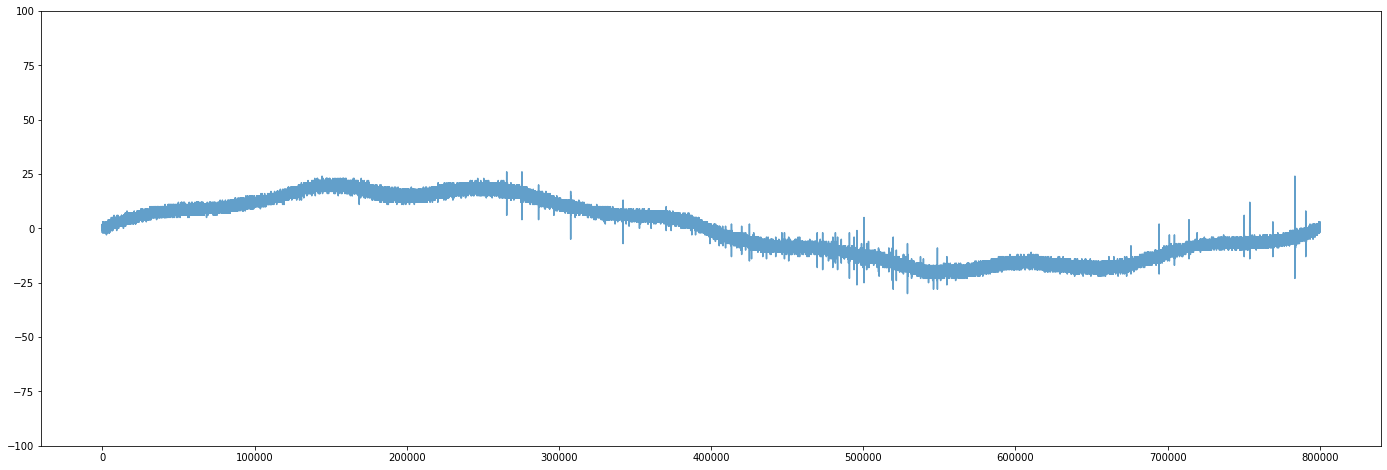

In [145]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[1].values), alpha=0.7);
plt.ylim([-100, 100])

#### Plotting Faulty signal

In [144]:
#signal with target 1 (Faulty Signal)
train.loc[201]['target']

1

(-100.0, 100.0)

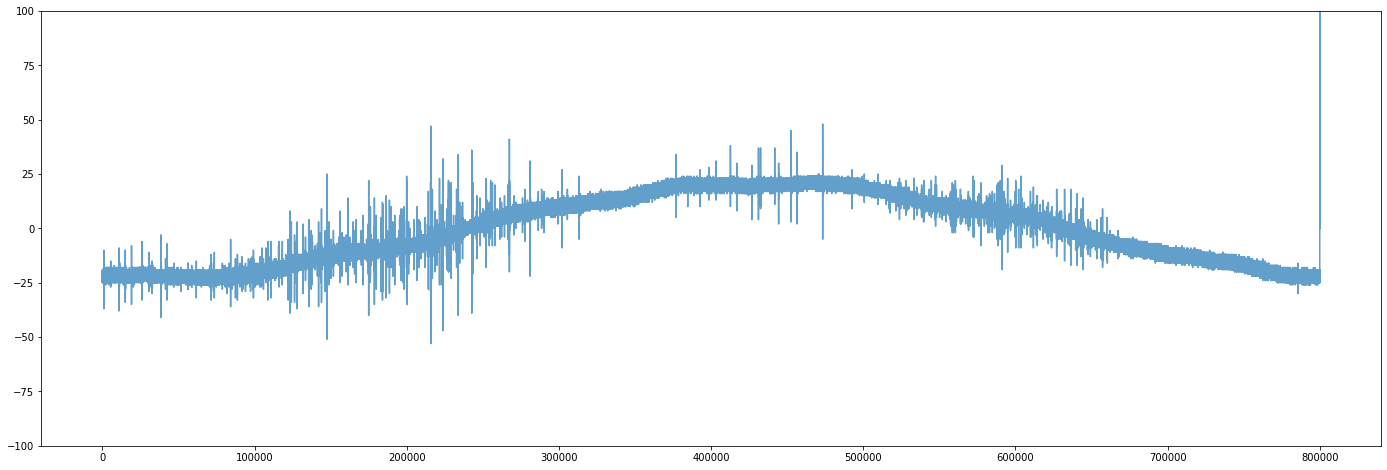

In [146]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[201].values), alpha=0.7);
plt.ylim([-100, 100])

#### Observation:

Faulty signal has more noise

### Plotting all three phases of a signal

#### Plotting all three phases of a normal signal

In [22]:
#signal with target 0 (Normal Signal)
train.loc[0:2][['target', 'id_measurement']]

,target,id_measurement
0,0,0
1,0,0
2,0,0


(-100.0, 100.0)

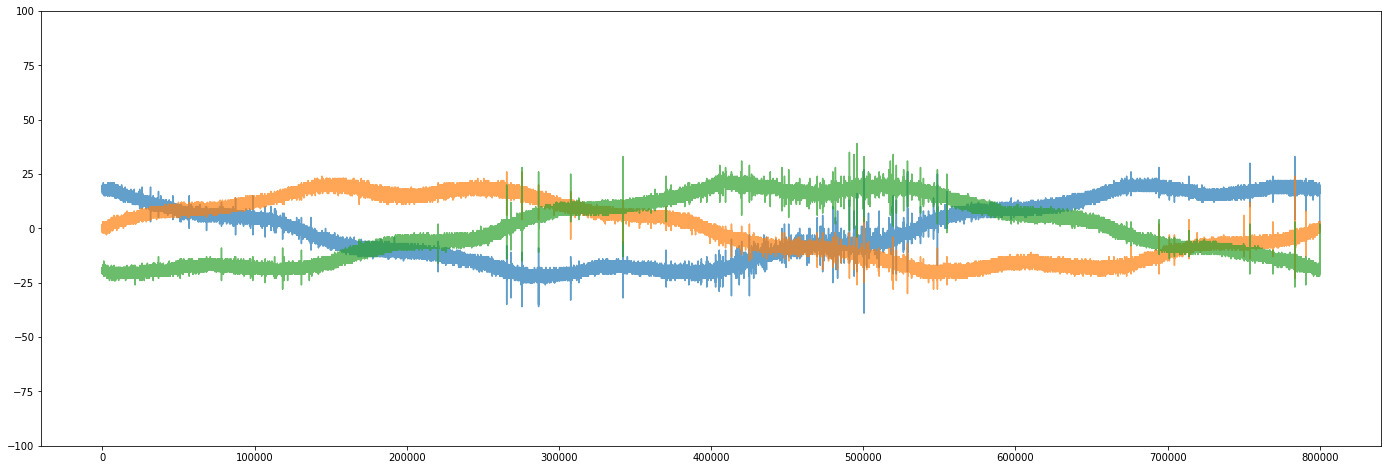

In [152]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[0].values), alpha=0.7);
plt.plot((train.loc[1].values), alpha=0.7);
plt.plot((train.loc[2].values), alpha=0.7);
plt.ylim([-100, 100])

#### Plotting all three phases of a faulty signal

In [155]:
#signal with target 1 (Faulty Signal)
train.loc[3:5][['target', 'id_measurement']]

,target,id_measurement
3,1,1
4,1,1
5,1,1


(-100.0, 100.0)

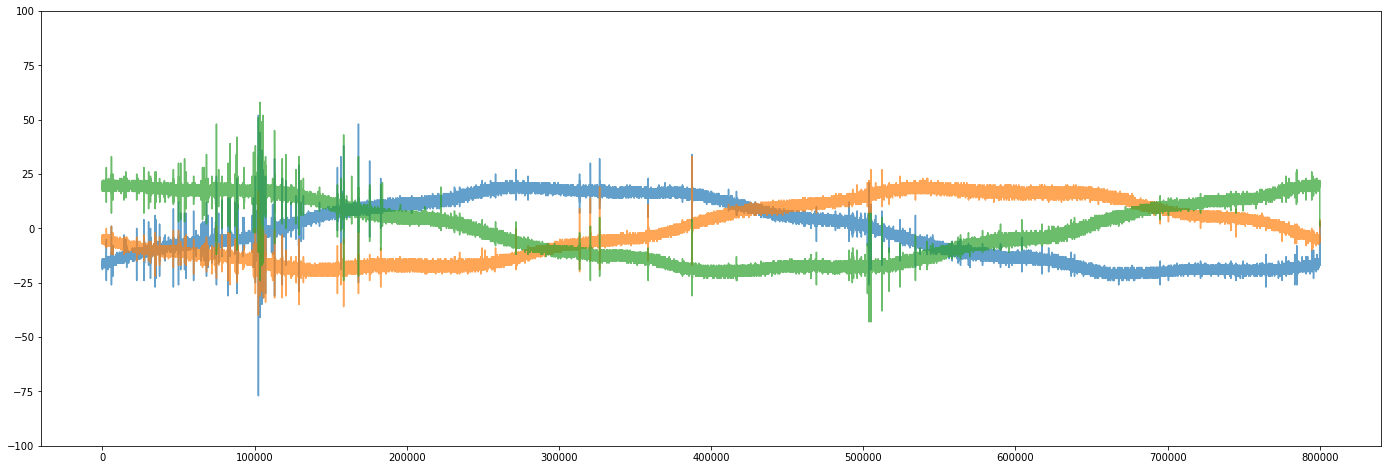

In [156]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[3].values), alpha=0.7);
plt.plot((train.loc[4].values), alpha=0.7);
plt.plot((train.loc[5].values), alpha=0.7);
plt.ylim([-100, 100])

#### Observation:

Faulty signal have more noise than the normal signal. 
Hence, noise can be a very useful feature for fault detection

## Flatiron

#### reference: https://www.kaggle.com/miklgr500/flatiron

The idea of flatiron is similar to High Pass Filter. It allows high frequency to pass. It can be useful for noise extraction

In [74]:
def flatiron(x, alpha=50, beta=1):
    new_x = np.zeros_like(x)
    zero = x[0]
    for i in range(1, len(x)):
        zero = zero*(alpha-beta)/alpha + beta*x[i]/alpha
        new_x[i] =  x[i] - zero
    return new_x

#### Plotting normal signal with flattened normal signal

In [81]:
#Flattening a Normal signal
normal_sample_filt =  [None] * 3
normal_sample_filt[0] = flatiron(train.loc[0].values)
normal_sample_filt[1] = flatiron(train.loc[1].values)
normal_sample_filt[2] = flatiron(train.loc[2].values)

In [82]:
normal_sample_filt

[array([  0,   0,   0, ..., -17, -16, -16]),
 array([ 0,  0, -1, ...,  0,  0,  0]),
 array([ 0,  0,  0, ..., 18, 19, 17])]

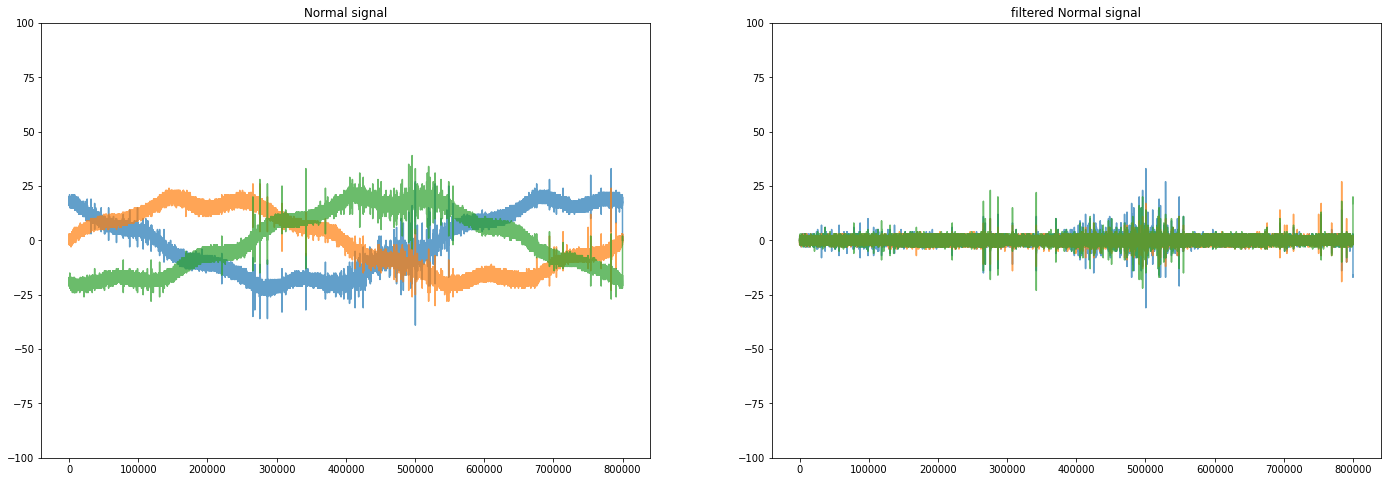

In [83]:
#Code to plot faulty signal with flattened faulty signal
f, ax = plt.subplots(1, 2, figsize=(24, 8))

ax[0].plot((train.loc[0].values), alpha=0.7);
ax[0].plot((train.loc[1].values), alpha=0.7);
ax[0].plot((train.loc[2].values), alpha=0.7);
ax[0].set_title('Normal signal')
ax[0].set_ylim([-100, 100])

ax[1].plot((normal_sample_filt)[0], alpha=0.7);
ax[1].plot((normal_sample_filt)[1], alpha=0.7);
ax[1].plot((normal_sample_filt)[2], alpha=0.7);
ax[1].set_title('filtered Normal signal')
ax[1].set_ylim([-100, 100])

del(normal_sample_filt)

#### Observation:

We are able to flatten the signal and are able to visualize the noise in the signal more easily

#### Plotting faulty signal with flattened faulty signal

In [84]:
#Flattening a Faulty signal
fault_sample_filt =  [None] * 3
fault_sample_filt[0] = flatiron(train.loc[3].values)
fault_sample_filt[1] = flatiron(train.loc[4].values)
fault_sample_filt[2] = flatiron(train.loc[5].values)

In [85]:
fault_sample_filt

[array([ 0,  0,  0, ..., 15, 14, 15]),
 array([0, 0, 0, ..., 5, 5, 5]),
 array([  0,   0,   0, ..., -18, -17, -17])]

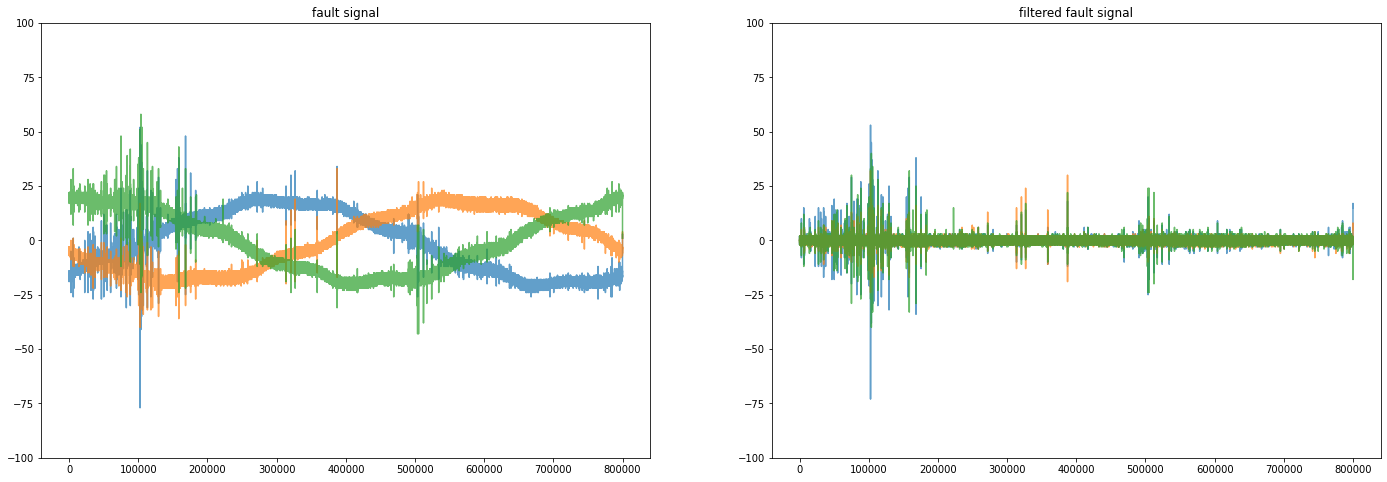

In [86]:
#Code to plot faulty signal with flattened faulty signal
f, ax = plt.subplots(1, 2, figsize=(24, 8))

ax[0].plot((train.loc[3].values), alpha=0.7);
ax[0].plot((train.loc[4].values), alpha=0.7);
ax[0].plot((train.loc[5].values), alpha=0.7);
ax[0].set_title('fault signal')
ax[0].set_ylim([-100, 100])

ax[1].plot((fault_sample_filt)[0], alpha=0.7);
ax[1].plot((fault_sample_filt)[1], alpha=0.7);
ax[1].plot((fault_sample_filt)[2], alpha=0.7);
ax[1].set_title('filtered fault signal')
ax[1].set_ylim([-100, 100])

del(fault_sample_filt)

#### Observation:

Faulty signal has more noise than normal signal